In [59]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima


In [60]:
data = pd.read_csv('report.csv')

In [61]:
data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [62]:
data.shape

(2829, 15)

In [63]:
len(data['report_year'].unique())

41

In [64]:
data.reset_index(drop=True)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


In [65]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [66]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [67]:
data=data[['report_year','agency_jurisdiction','robberies']]

In [68]:
data.head()

,report_year,agency_jurisdiction,robberies
0,1975,"Albuquerque, NM",819.0
1,1975,"Arlington, TX",113.0
2,1975,"Atlanta, GA",3887.0
3,1975,"Aurora, CO",171.0
4,1975,"Austin, TX",529.0


In [69]:
df=data.loc[data['agency_jurisdiction'] == 'Los Angeles, CA']

In [70]:
df.head()

,report_year,agency_jurisdiction,robberies
29,1975,"Los Angeles, CA",14590.0
98,1976,"Los Angeles, CA",14225.0
167,1977,"Los Angeles, CA",15246.0
236,1978,"Los Angeles, CA",17105.0
305,1979,"Los Angeles, CA",20454.0


In [73]:
df.isnull().sum()

report_year            0
agency_jurisdiction    0
robberies              0
dtype: int64

In [74]:
df.reset_index(drop=True)

,report_year,agency_jurisdiction,robberies
0,1975,"Los Angeles, CA",14590.0
1,1976,"Los Angeles, CA",14225.0
2,1977,"Los Angeles, CA",15246.0
3,1978,"Los Angeles, CA",17105.0
4,1979,"Los Angeles, CA",20454.0
5,1980,"Los Angeles, CA",25637.0
6,1981,"Los Angeles, CA",28152.0
7,1982,"Los Angeles, CA",30029.0
8,1983,"Los Angeles, CA",29243.0
9,1984,"Los Angeles, CA",27323.0


In [75]:
hc=df[['report_year','robberies']]
hc.set_index('report_year',inplace=True)
hc.shape

(41, 1)

In [76]:
hc.head()

,robberies
report_year,
1975,14590.0
1976,14225.0
1977,15246.0
1978,17105.0
1979,20454.0


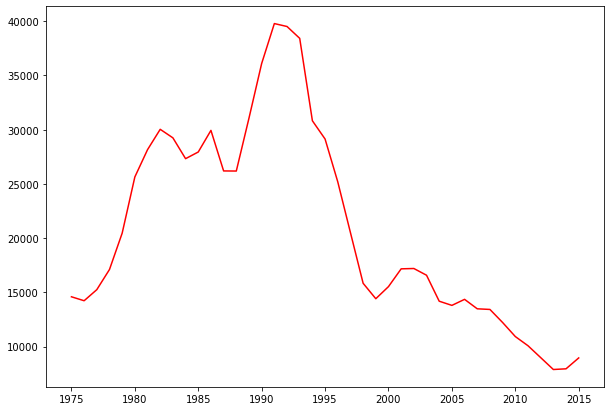

In [77]:
plt.figure(figsize=(10,7))
plt.plot(hc,'r-')

In [78]:
diff = hc.diff(periods=1)

In [79]:
diff = diff[1:]
diff.head()

,robberies
report_year,
1976,-365.0
1977,1021.0
1978,1859.0
1979,3349.0
1980,5183.0


40

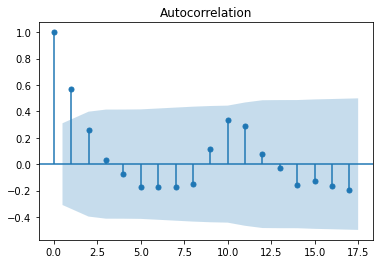

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff)
diff.size


<AxesSubplot:xlabel='report_year'>

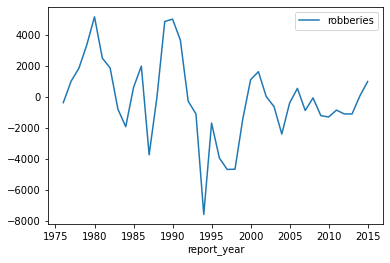

In [81]:
diff.plot()

In [82]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(hc)


(0.25545366635785327, True)

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
result = adfuller(hc, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.6887351282715457
n_lags: 0.43692562385025036
p-value: 0.43692562385025036
Critial Values:
   1%, -3.610399601308181
Critial Values:
   5%, -2.939108945868946
Critial Values:
   10%, -2.6080629651545038


In [85]:
train=diff[:34]
test=diff[33:]

In [86]:
train.tail()

,robberies
report_year,
2005,-384.0
2006,556.0
2007,-872.0
2008,-59.0
2009,-1205.0


In [87]:
test.head()
test.size

7

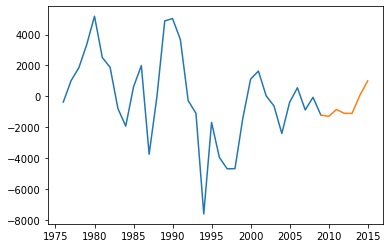

In [88]:
plt.plot(train)
plt.plot(test)

C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-98-3d6be4246d4e>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to c

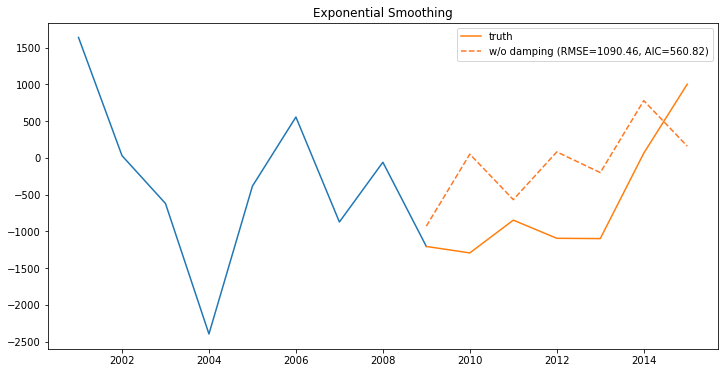

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=4)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(7)
#fit2 = model2.fit()
#pred2 = fit2.forecast(7)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
#sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[25:34], train.values[25:34]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--', color='#ff7823',label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
#ax.plot(test.index, pred2, linestyle='--', color='#3c763d',label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Exponential Smoothing");

In [97]:
from sklearn.metrics import r2_score
r2_score(test, pred)

-0.22135841857756433

In [91]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=10, max_d=5, max_q=10, start_P=0, 
                          D=0, start_Q=1, max_P=5, max_D=5,
                          max_Q=1, m=10, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,random_state=40,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[10] intercept   : AIC=617.610, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[10] intercept   : AIC=618.559, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[10] intercept   : AIC=615.667, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[10] intercept   : AIC=616.264, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[10]             : AIC=616.574, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[10] intercept   : AIC=619.885, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[10] intercept   : AIC=618.786, Time=0.08 sec
 ARIMA(1,1,0)(1,0,1)[10] intercept   : AIC=617.519, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[10] intercept   : AIC=617.374, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[10] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(1,0,0)[10] intercept   : AIC=617.433, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[10] intercept   : AIC=618.982, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[10] intercept   : AIC=618.886, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[10] intercept   : AIC=615.813, Time=0.11 sec
 ARIMA(2,1,1)(1,0,0)[10] intercept   

In [92]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 10)   Log Likelihood                -303.823
Date:                             Fri, 08 Jan 2021   AIC                            613.646
Time:                                     22:18:36   BIC                            618.136
Sample:                                          0   HQIC                           615.157
                                              - 34                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3843      0.184     -2.089      0.037      -0.745      -0.024
ar.S.L10       0.4272      0.246      1.735      0.083      -0.055       0.910
sigma2      5.497e+06   1.33e+06      4.125      0.000    2.89e+06    8.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.95   Prob(JB):                         0.11
Heteroskedasticity (H):               0.37   Skew:                            -0.84
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 7),index=test.index)
prediction.columns = ['predicted_Rapes_Rate_for_LA']
prediction

,predicted_Rapes_Rate_for_LA
report_year,
2009,757.005379
2010,980.446665
2011,293.460838
2012,15.334114
2013,-743.426352
2014,116.160392
2015,517.756584


Predicted Robberies Crime Rates of LA 


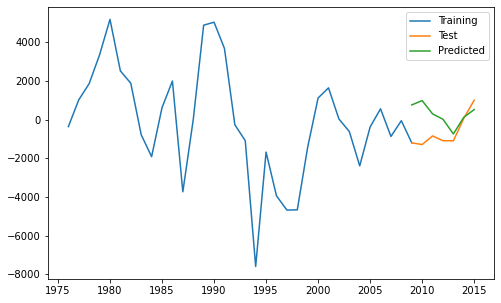

In [99]:
print("Predicted Robberies Crime Rates of LA ")
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import r2_score
r2_score(test, prediction)


-1.7079067968429622